# CHEN 5595 Homework 8

This HW focuses on linear basis function models and singular value decomposition. It consists only of coding exercises. I provide several definitions and hints throughout that will help you.  If you are confused about anything, do not panic, send us a message on Piazza! We are here to help you learn.

Please answer the numerical exercises using an ipython notebook **in [Google Colab](https://colab.research.google.com/)** (provide the link with your handwritten homework). **Please answer each coding problem  in a different cell**.

You can also view this ipython notebook in your browser through [binder](https://mybinder.org/v2/gh/smcantab/chen5595-fall2020/d18d22db7f1e11efec07c09883526be2c2dbe7b3?filepath=homework%2Fhw8-questions.ipynb) or through nbviewer [link](https://nbviewer.jupyter.org/github/smcantab/chen5595-fall2020/blob/master/homework/hw8-questions.ipynb).

## Linear Basis Function Models

Consider the following Python functions that generates synthetic data of the form

$$t = f(x) + \epsilon$$
    
where
    
$$f(x) = \sin(2 \pi x) + \sin(4 \pi x)$$

and
    
$$\epsilon \sim \mathcal{N}(\mu, \sigma)$$

In [1]:
import numpy as np
def func(x):
    fmax = np.sqrt((207 + 33**1.5)/128)
    return (np.sin(2 * np.pi * x) + np.sin(4 * np.pi * x))/fmax

def create_toy_data(func, sample_size, std):
    x = np.linspace(0, 1, sample_size)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

Now consider the linear basis function model

$$\begin{aligned}
y(x, \mathbf{w}) &= w_0 + \sum_{j=1}^{M-1}w_j\phi_j(\mathbf{x}) \\
&= \mathbf{w}^\top \mathbf{\phi}(\mathbf{x})
\end{aligned}$$
    
where we have defined the dummy basis function $\phi_0(\mathbf{x})=1$, $\mathbf{w} = (w_0, \dots, w_{M-1})^\top$ are the parameters, $\mathbf{x} = (x_0, \dots, x_{D-1})^\top$ is the D-dimensional input and $\mathbf{\phi}(\mathbf{x})=(\phi_0(\mathbf{x}), \dots, \phi_{M-1}(\mathbf{x}))^\top$ is the M-dimensional _feature vector_.

    
Now consider a dataset of 1D inputs $\mathbf{X} = \{ x_1, x_2, \dots, x_N\}$ with corresponding target vectors $\mathbf{t} = \{ t_1, t_2, \dots, t_N\}$. The sum-of-squares error function for the linear regression problem is
    
$$\begin{aligned}
E(\mathbf{w}) &= \dfrac{1}{2} \sum_{n=1}^N \{t_n - y(x, \mathbf{w})\}^2 \\ &= \dfrac{1}{2} \sum_{n=1}^N \{ t_n- \mathbf{w}^\top \mathbf{\phi}(x_n)\}^2
\end{aligned}$$

Solving for $\mathbf{w}$ we obtain the Maximum Likelihood estimate of the parameters

$$\mathbf{w}_{ML} = \Phi^\dagger \mathbf{t}$$
    
where $\Phi^\dagger = (\Phi^\top\Phi)^{-1}\Phi^T$ is the Moore-Pensore pseudo-inverse of the _design matrix_ $\Phi$, defined as:
    
$$\Phi = \begin{pmatrix}\phi_0(x_1) & \phi_1(x_1) & \dots & \phi_M(x_1) \\ \phi_0(x_2) & \phi_1(x_2) & \dots & \phi_M(x_2) \\ \vdots & \vdots & \ddots & \vdots \\ \phi_0(x_N) & \phi_1(x_N) & \dots & \phi_M(x_N) \end{pmatrix}$$

The Maximum Likelihood estimate of the variance can be found by maximizing the log-likelihood with respect to the noise and yields

$$\sigma_{ML}^2 = \frac{1}{N}\sum_{n=1}^N \{ t_n - \mathbf{w}_{ML}^\top \mathbf{\phi}(x_n)\}^2$$

### Problem 1

Write two Python classes that can generate the feature vectors $\mathbf{\phi}(x)$ for Gaussian basis functions

$$\phi_j(x) = \exp\left\{ -\frac{(x-\mu_j)^2}{2s^2}\right\}$$

and sigmoidal basis functions

$$\phi_j(x) = \sigma \left( \frac{x-\mu_j}{s}\right)$$

where $\sigma(a) = 1/(1+ \exp(-a))$ is the logistic sigmoid function. 

Each class should take the form (e.g. for the Gaussian features)

```python
class GaussianFeature(object):
    def __init__(self, mean, var):
        self.mean = mean
        self.var = var
        
    def _gauss(self, x, mean):
        #returns gaussian basis function evaluated at point x
       
    def get_feature_vec(self, x):
        basis = []
        for mean in self.mean:
            basis.append(self._gauss(x, mean))
        return np.array(basis)
```

Then write a function to build the design matrix $\Phi$ for a dataset $\mathbf{X} = \{ x_1, x_2, \dots, x_N\}$, of the following form

```python
def build_design_matrix(xdata, feature):
    # write the missing code here to generate design matrix W
    return W
```

where `xdata` is the array of inputs $\mathbf{X} = \{ x_1, x_2, \dots, x_N\}$ and `feature` is an instance of `GaussianFeature` of `SigmoidFeature`.

Finally write a class to perform linear regression of the form

```python
class LinearRegression(object):
    
    def fit(self, W, t):
        # W is the design matrix for the training data and t is the corresponding target variables
        # compute the weights self.w and the variance self.var
    
    def predict(self, W):
        # W is the design matrix for the test data
        # returns the prediction y(x, self.w) and the variance y_std = self.var
```

Note that you can compute the pseudoinverse using the function [`numpy.linalg.pinv`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.pinv.html).

Armed with these functions we generate a training set and test set as follows

In [2]:
np.random.seed(42) # fix the random seed
x_train, y_train = create_toy_data(func, 30, 0.33)
x_test = np.linspace(0, 1, 100)
y_test = func(x_test)

Also define the means of the basis of the feature vectors

In [3]:
means = np.linspace(0, 1, 8)

**Q1.** Using a plotting library of your choosing (e.g. matplotlib) make a graph showing 

- the function $f(x)$ i.e. `(x_test, y_test)`, shown as a solid line  
- the training data `(x_train, y_train)`, shown as circles  
- the line of best fit `(x_test, y_fit)`, shown as a solid line, where `y_fit` has been obtained by linear regression using the Gaussian basis functions with means given by `means` and variance $s^2=1$
- plot the confidence intervals around the line of best fit `y` using the function [`plt.fill_between`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.fill_between.html) to shade the region between `y-y_std` and `y+ystd` using `color='orange'`.

Add a legend to the plot. 

**Q2.** Then do the same (in a separate graph) for the sigmoidal basis function with with means given by `means` and $s=1$.

**Q3.** Finally show the effect of varying `s` for the two choices of basis functions by changing `s` between $10^{-3}$ and $10^4$. Explain what you observe.

## Singular Value Decomposition

The computation of the pseudoinverse required for the solution of the linear basis function models, discussed above, can be achieved through the use of _Singular Value Decomposition_ (SVD), which is a unique matric factorization/decomposition that exists for every complex valued matrix. If $\mathbf{X} \in \mathbb{C}^{N \times M}$, then

$$\mathbf{X} =  \mathbf{U} \mathbf{\Sigma} \mathbf{V}^*$$

where $\mathbf{U} \in \mathbb{C}^{N \times N}$ and $\mathbf{V} \in \mathbb{C}^{M \times M}$ are _unitary matrices_ with orthonormal columns, and $\mathbf{\Sigma} \in \mathbb{R}^{N \times M}$ is a diagonal matrix with real, nonnegative entries. The $^*$ indicates the complex conjugate transpose, which for $\mathbf{U}$ and $\mathbf{V}$ real amounts to the transpose. Then if we write the generic linear system

$$\mathbf{X} \mathbf{w} = \mathbf{t}$$

we can solve for $\mathbf{w}$ in terms of the SVD as

$$\begin{aligned}
\mathbf{w} &= \mathbf{V} \mathbf{\Sigma}^{-1} \mathbf{U}^* \mathbf{t}\\
&= \mathbf{X}^\dagger \mathbf{t}
\end{aligned}$$

where $\mathbf{X}^\dagger = \mathbf{V} \mathbf{\Sigma}^{-1} \mathbf{U}^*$ is the Moore-Penrose (left) pseudoinverse.

Te most defining property of the SVD is that is provides an _optimal_ low-rank approximation to a matrix $\mathbf{X}$. In fact, since a rank-$r$ approximation is obtained by keeping the $r$ singular values and discarding the rest (i.e. by keeping the first $r$ leading columns of $\mathbf{U}$, $r$ leading diagonal elements of $\mathbf{\Sigma}$ and $r$ leading rows of $\mathbf{V}^*$). This result can be phrased more rigorously in terms of the Eckart-Young theorem (though it was first discovered by Schmidt), stating that (from Brunton and Kutz's DDSE)

**Eckart-Young theorem**: _The optimal rank-r approximation to $\mathbf{X}$, in a least-squares sense, is given by the rank-r  SVD truncation $\tilde{\mathbf{X}}$:_

$$ \mathop{\mathrm{argmin}}_{\tilde{\mathbf{X}}, \text{ s.t. } \mathrm{rank}(\mathbf{X})=r} ||\mathbf{X} - \tilde{\mathbf{X}}||_F = \tilde{\mathbf{U}} \tilde{\mathbf{\Sigma}} \tilde{\mathbf{V}}^*$$

_where $\tilde{\mathbf{U}}$ and $\tilde{\mathbf{V}}$ denote the first $r$ leading columns of $\mathbf{U}$ and $\mathbf{V}$; $\tilde{\mathbf{\Sigma}}$ contains the leading $r \times r$ sub-block $\mathbf{\Sigma}$, and $||\cdot||_F$ is the Frobenius norm._

Because $\mathbf{\Sigma}$ is diagonal, the rank-$r$ approximation can also be expressed in terms of the dyadic sum

$$\tilde{\mathbf{X}} = \sum_{i=1}^r \sigma_i \mathbf{u}_i \mathbf{v}_i = \sigma_1 \mathbf{u}_1 \mathbf{v}_1^* + \dots + \sigma_r \mathbf{u}_r \mathbf{v}_r^*$$

where $\sigma_i$ denotes the i-th element of the diagonal of $\mathbf{\Sigma}$ and $\mathbf{u}_i$ and $\mathbf{v}_i$ are the columns of $\mathbf{U}$ and $\mathbf{V}$.

### Problem 2

Use the function [`np.linalg.svd`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html) to compute the SVD of a real random matrix of size $5 \times 5$ (use [`np.random.rand`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html) to generate the random matrix) and verify that $\mathbf{X}^\dagger \mathbf{X} = \mathbf{I}$. Then run the code below to load the matrix in figure [`Samantha_Cristoforetti_official_portrait_in_an_EMU_spacesuit.txt`](https://github.com/smcantab/chen5595-fall2020/blob/master/homework/Samantha_Cristoforetti_official_portrait_in_an_EMU_spacesuit.txt) and plot it.

(-0.5, 799.5, 999.5, -0.5)

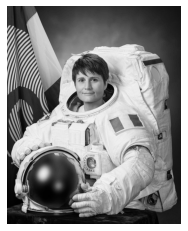

In [4]:
import numpy as np
import matplotlib.pyplot as plt
X = np.loadtxt('Samantha_Cristoforetti_official_portrait_in_an_EMU_spacesuit.txt')
plt.imshow(X, cmap='gist_gray')
plt.axis('off')

This is a portrait of Samantha Cristoforetti (from [Wikipedia](https://en.wikipedia.org/wiki/Samantha_Cristoforetti)) _"an Italian European Space Agency astronaut, former Italian Air Force pilot and engineer. She holds the record for the longest uninterrupted spaceflight by a European astronaut (199 days, 16 hours), and until June 2017 held the record for the longest single space flight by a woman until this was broken by Peggy Whitson and later by Christina Koch. She is also the first Italian woman in space."_

This figure has $1000 \times 800$ pixels. A good way of illustrating the idea of matrix approximation is image compression. The grayscale image $\mathbf{X}$ above can be thought of as a matrix of size $1000 \times 800$ of integers between 0-255. We compress the image by producing the approximate matrix $\tilde{\mathbf{X}}$ for various choices of the truncation value $r$. Use the function below to produce the rank-$r$ approximation of $\mathbf{X}$

In [5]:
def rankr_approximation(X, r):
    u, s, vh = np.linalg.svd(X, full_matrices=False)
    Xr = u[:, :r] @ np.diag(s)[:r, :r] @ vh[:r, :]
    return np.round(Xr).astype('uint8')

**Q1.** Define the amount of storage that would be required for a rank-r approximation vs. the original matrix, assuming that each pixel is an 8 bits integer. 

**Q2.** Plot the approximate matrix $\tilde{\mathbf{X}}$ for various choice of $r \in [1, 800]$ and comment on what you observe and the relative savings in data storage. For each $r$ also plot $|\mathbf{X} - \tilde{\mathbf{X}}|$ and comment on what you observe.